In [12]:
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [7]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))

model.add(Dense(1))


In [8]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


In [9]:
history = model.fit(x_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)


In [13]:
test_mse_score, test_mae_score = model.evaluate(x_test_scaled, y_test)

print(f"Test MSE: {test_mse_score:.3f}")
print(f"Test MAE: {test_mae_score:.3f}")


4/4 [==============================] - 0s 3ms/step - loss: 23.8226 - mae: 3.1081
Test MSE: 23.823
Test MAE: 3.108


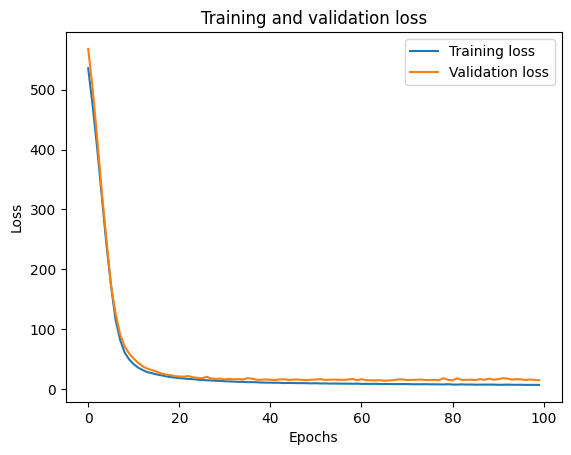

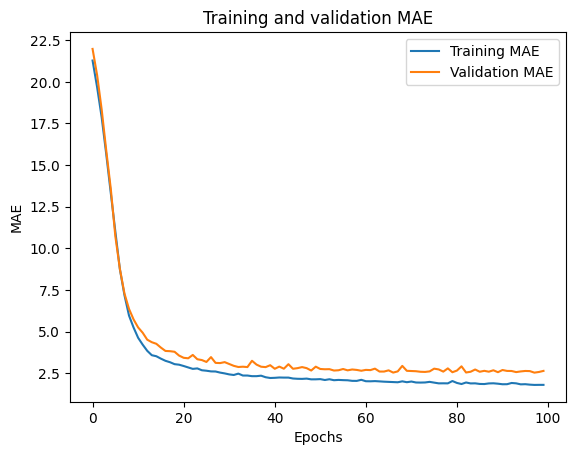

In [11]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()
